Text(0.5, 1.0, 'angled cross section through blue image')

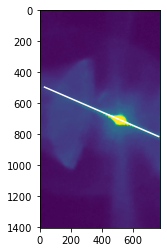

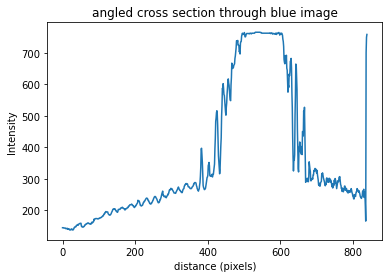

In [7]:
from matplotlib import image
from matplotlib import pyplot as plt
import numpy as np
# use the first command to select interactive plotting.  This allows you to select points
# using a mouseclick.  Unfortunately, you can't imbed an interactive plot in a notebook,
# so I used interactive plots to select points and then wrote down the points and turned it off
# %matplotlib 
%matplotlib inline
image = image.imread('blue.jpg')  # read in the jpeg image
bwimage = np.sum(image,2)         # sum red green and blue to make black and white image
fig = plt.figure('image plot')
plt.clf()                         # erase the old image
plt.imshow(bwimage)               # plot the image
#This code would select points using interactive plot, but turned off 
# p = plt.ginput(2)
p = [(30.422077922077733, 494.85064935064906),(767.3701298701297, 813.9415584415582)]
x,y = zip(*p)                     # unpack the list of tuples generated by ginput into x and y
plt.plot(x,y,'-w')                # plot x and y as a white line on the image
#%%
# Now we have to do a little work to collect the data just along the line we picked
nxpt = bwimage.shape[1]           # find number of x values
# define list of x-values going from 0 to maximum lengt of x-axis on camera in pixels
xarray = np.arange(nxpt).astype(int) 
# pick the y-values corresponding to the value of the white line 
yarray = (y[0]+xarray*(y[-1]-y[0])/nxpt).astype(int)
# select the intensity values fromt the image that lie along the white line
pts = bwimage[yarray,xarray]
# a little math, to convert length along the x-axis into length along the white line
Dx = xarray[-1]-xarray[0]
Dy = yarray[-1]-yarray[0]
Ds = np.sqrt(Dx**2+Dy**2)/Dx
sarray = Ds*xarray
# now plot the cross section we just selected and label the plot
plt.figure('section plot')
plt.plot(sarray,pts)
plt.xlabel('distance (pixels)')
plt.ylabel('Intensity')
plt.title('angled cross section through blue image')